# Start by importing libraries

In [5]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

# Import data

In [6]:
import csv
import pandas as pd
import numpy as np

filename = "iris.data"

# read csv
pdf = pd.read_csv(filename, index_col=False)

# create dataframe
dataframe = pdf.to_numpy()
pdf = pd.DataFrame(dataframe)
pdf.rename(columns={0: 'sepal_length', 1: 'sepal_width', 2 : 'petal_length', 3 : 'petal_width', 4 : 'class'}, inplace=True)

# create an array of features (X) and classes (y)
X = pdf[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = len(pdf['class'].unique())

# create array of features
features = pdf.columns

# create array of classes
classes = pdf['class'].unique()

# Modeling - generating variables

In [7]:
# create random seed
np.random.seed(0)

# Model Clusters

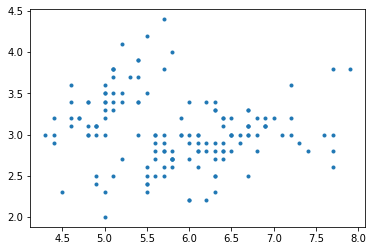

In [8]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

# Data Visualization

In [9]:
pdf[features[0]] = pdf[features[0]].astype('double')
pdf[features[1]] = pdf[features[1]].astype('double')
pdf[features[2]] = pdf[features[2]].astype('double')
pdf[features[3]] = pdf[features[3]].astype('double')
pdf.loc[pdf['class'] == 'Iris-setosa', 'class'] = 0
pdf.loc[pdf['class'] == 'Iris-versicolor', 'class'] = 1
pdf.loc[pdf['class'] == 'Iris-virginica', 'class'] = 2
pdf['class'] = pdf['class'].astype('int')

pdf.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class             int32
dtype: object

In [10]:
numberOfClusters = y # USER SET

k_means = KMeans(init = "k-means++", n_clusters = numberOfClusters, n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_
#k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
#k_means_cluster_centers

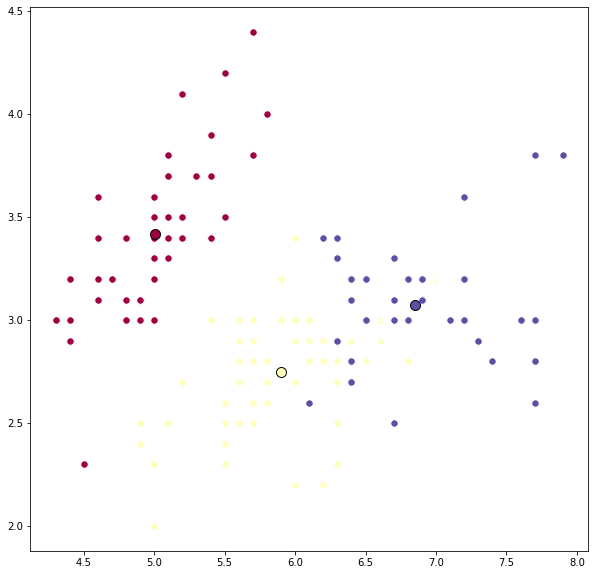

In [11]:
k_means3 = KMeans(init = "k-means++", n_clusters = numberOfClusters, n_init = 40)
k_means3.fit(X)
fig = plt.figure(figsize=(10, 10))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=15)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
plt.show()


# label data points